# This example shows how to setup a simple traveling-wave accelerating structure

In [1]:
%plot -f SVG

In [2]:
RF_Track;


RF-Track, version 2.3.3a0

Copyright (C) 2016-2025 CERN, Geneva, Switzerland. All rights reserved.

Author and contact:
 Andrea Latina <andrea.latina@cern.ch>
 BE-ABP Group
 CERN
 CH-1211 GENEVA 23
 SWITZERLAND

This software is distributed under a CERN proprietary software
license in the hope that it will be useful, but WITHOUT ANY WARRANTY;
not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

See the COPYRIGHT and LICENSE files at the top-level directory of
the RF-Track download area: https://gitlab.cern.ch/rf-track

RF-Track was compiled with GSL-2.7 and fftw-3.3.10



## Structure parameters

In [3]:
a0 = 1.0; % V/m, principal Fourier coefficient
freq = 12e9; % Hz, X-band
ph_adv = 2*pi/3; % radian, phase advance per cell
n_cells = 3; % number of cells, negative sign indicates a start from the beginning of the cell

## Create a structure and sets its reference time

In [4]:
TW = TW_Structure (a0, 0, freq, ph_adv, n_cells);
TW.set_phid(90)

## Let's plot the field using the method ```Element::get_field(x, y, z, t)```
* $x$, $y$, $z$ are in mm
* $t$ is in mm/$c$

These coordinates can be vectors to get the field at several points in just one call.

This function returns both the electric and the magnetic fields

In [5]:
TW.get_length()

ans = 0.024983


In [6]:
[E,B] = TW.get_field(0, 0, 5, 0)

E =

        0
        0
   0.3082

B =

   0
   0
   0



T_period = 24.983


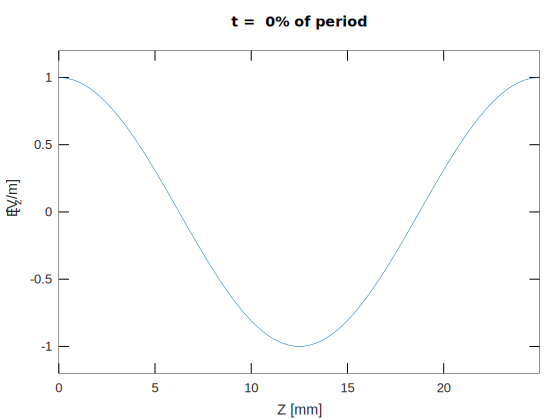

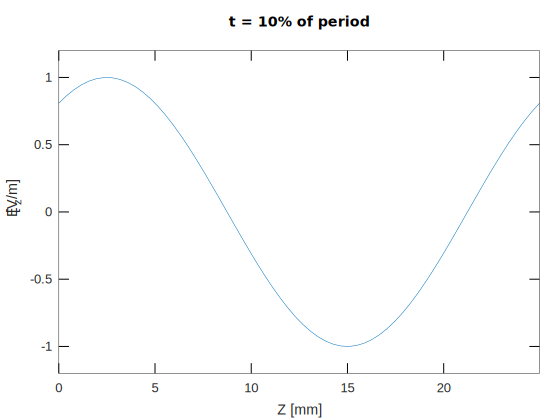

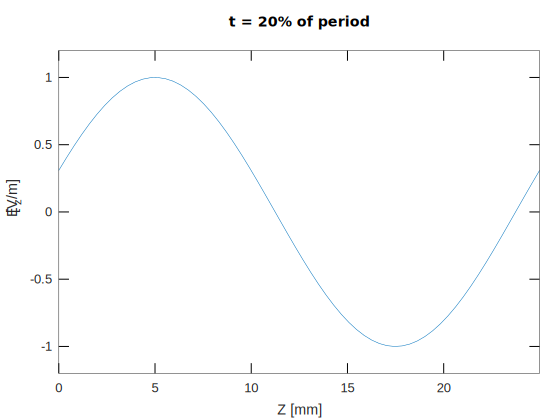

In [7]:
TW.set_t0(0.0); % set the reference time

Z = linspace(0, TW.get_length()*1e3, 64); % mm

T_period = TW.get_period() % mm/c
for t = [ 0.0 0.1 0.2 ]*T_period

    % read the field along the axis
    [E,B] = TW.get_field(0, 0, Z, t);

    % plot the field Ez
    figure;
    plot(Z, E(:,3));
    title(sprintf('t = %2.f%% of period', t*100/T_period));
    xlabel('Z [mm]');
    ylabel('E_z [V/m]');
    axis([ 0 Z(end) -a0*1.2 a0*1.2 ]);

end

In [8]:
TW.get_period() / RF_Track.ns

ans = 0.083333


In [9]:
[E,B] = TW.get_field(3, 0, Z, t);
E_field = E(1:10,:)
B_field = B(1:10,:)

E_field =

  -0.3588        0   0.3090
  -0.3454        0   0.4022
  -0.3286        0   0.4913
  -0.3085        0   0.5756
  -0.2853        0   0.6542
  -0.2593        0   0.7262
  -0.2308        0   0.7911
  -0.1999        0   0.8480
  -0.1671        0   0.8966
  -0.1326        0   0.9362

B_field =

            0  -1.1968e-09            0
            0  -1.1521e-09            0
            0  -1.0960e-09            0
            0  -1.0290e-09            0
            0  -9.5177e-10            0
            0  -8.6507e-10            0
            0  -7.6978e-10            0
            0  -6.6684e-10            0
            0  -5.5727e-10            0
            0  -4.4216e-10            0

